In [1]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
data = np.random.rand(100)
labels = ["Class1" if x <= 0.5 else "Class2" for x in data[:50]]

In [5]:
def knn_classifier(train_data, train_labels, test_point, k):
    distances = sorted([(abs(test_point - train_data[i]), train_labels[i]) for i in range(len(train_data))], key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

train_data, train_labels = data[:50], labels
test_data = data[50:]
k_values = [1, 2, 3, 4, 5, 20, 30]

print("--- k-Nearest Neighbors Classification ---")
print("Training dataset: First 50 points labeled based on (x <= 0.5 -> Class1, x > 0.5 -> Class2)")
print("Testing dataset: Remaining 50 points to be classified\n")

results = {k: [knn_classifier(train_data, train_labels, test_point, k) for test_point in test_data] for k in k_values}

--- k-Nearest Neighbors Classification ---
Training dataset: First 50 points labeled based on (x <= 0.5 -> Class1, x > 0.5 -> Class2)
Testing dataset: Remaining 50 points to be classified



In [7]:
for k, classified_labels in results.items():
    print(f"Results for k = {k}:")
    for i, label in enumerate(classified_labels, start=51):
        print(f"Point x{i} (value: {test_data[i - 51]:.4f}) is classified as {label}")
    print()

print("Classification complete.\n")

Results for k = 1:
Point x51 (value: 0.2613) is classified as Class1
Point x52 (value: 0.7304) is classified as Class2
Point x53 (value: 0.2633) is classified as Class1
Point x54 (value: 0.9322) is classified as Class2
Point x55 (value: 0.9128) is classified as Class2
Point x56 (value: 0.0655) is classified as Class1
Point x57 (value: 0.8830) is classified as Class2
Point x58 (value: 0.5131) is classified as Class2
Point x59 (value: 0.9665) is classified as Class2
Point x60 (value: 0.9685) is classified as Class2
Point x61 (value: 0.5541) is classified as Class2
Point x62 (value: 0.4207) is classified as Class1
Point x63 (value: 0.3510) is classified as Class1
Point x64 (value: 0.0360) is classified as Class1
Point x65 (value: 0.3232) is classified as Class1
Point x66 (value: 0.2042) is classified as Class1
Point x67 (value: 0.1435) is classified as Class1
Point x68 (value: 0.9065) is classified as Class2
Point x69 (value: 0.3802) is classified as Class1
Point x70 (value: 0.0774) is cl

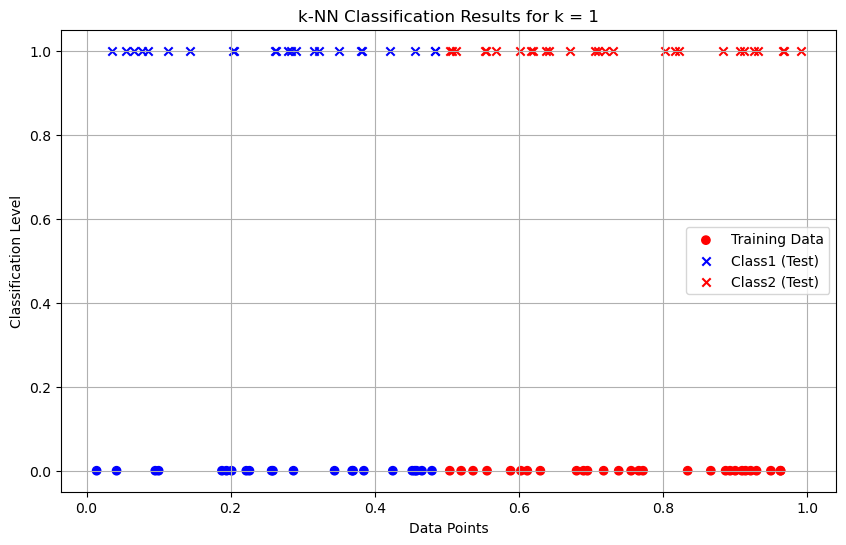

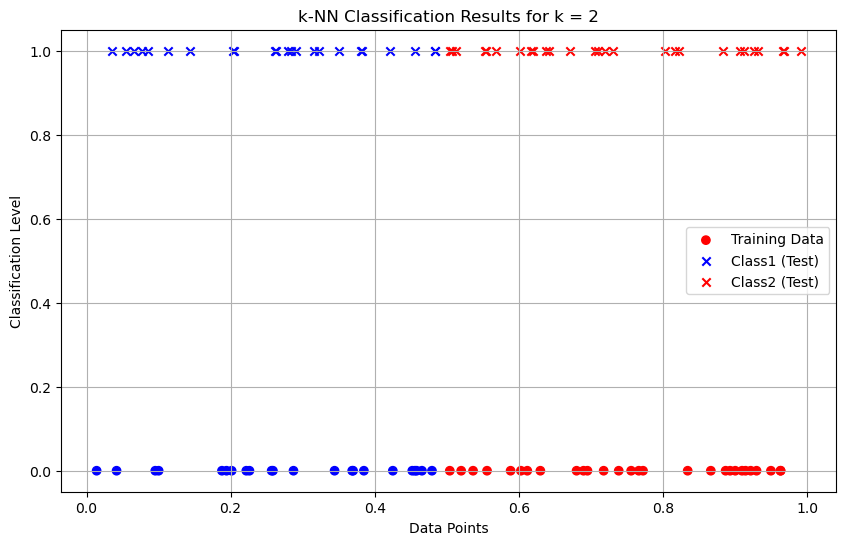

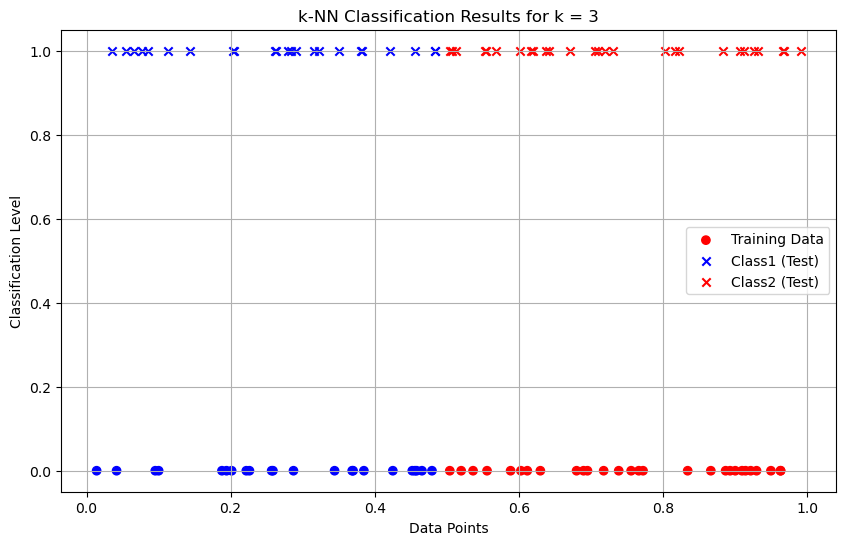

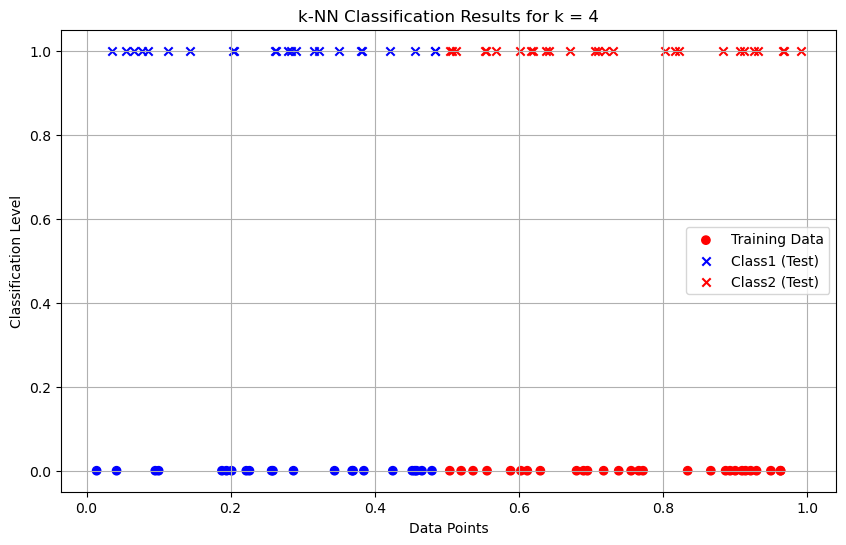

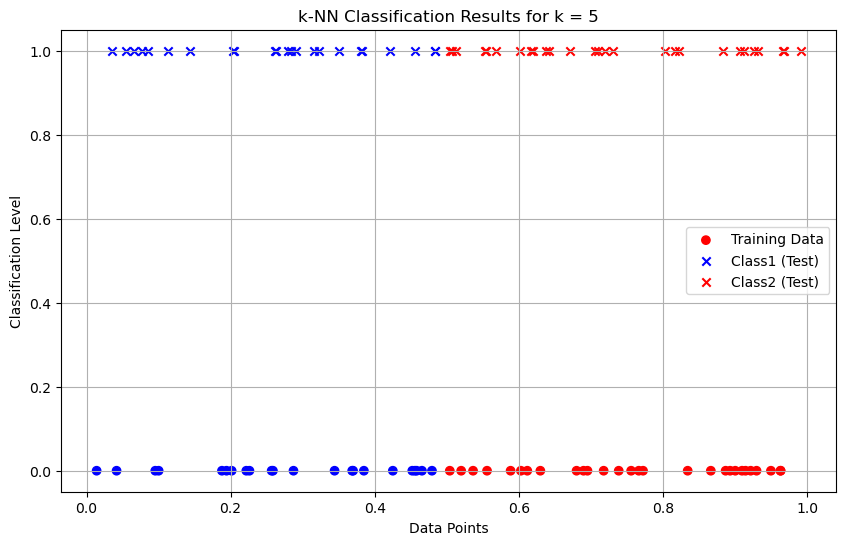

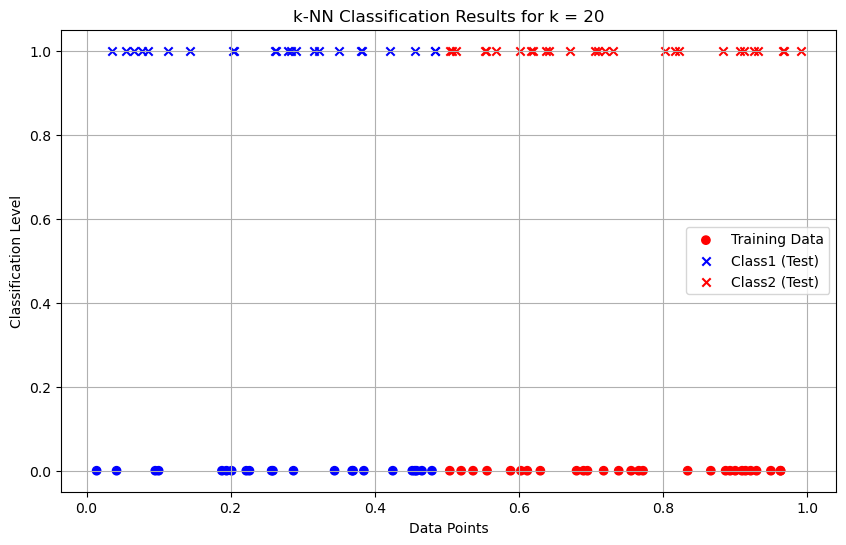

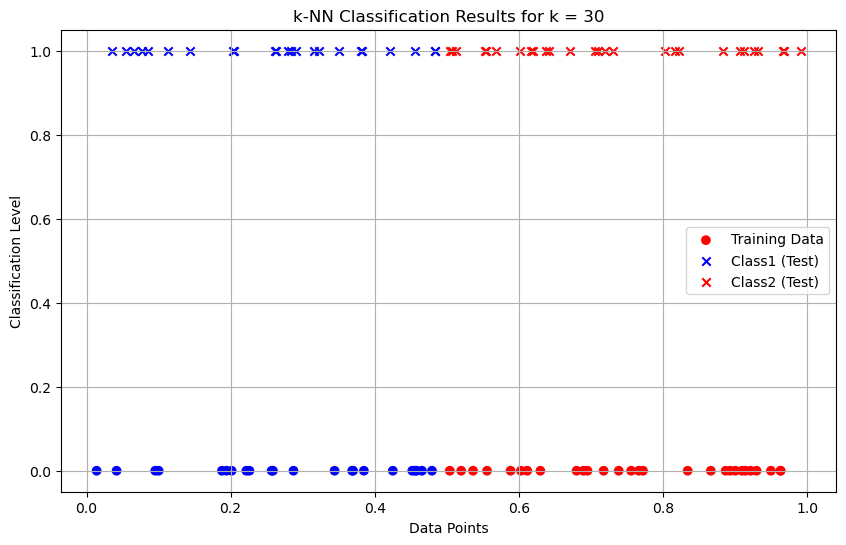

In [9]:
for k, classified_labels in results.items():
    class1_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class1"]
    class2_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class2"]
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data, [0] * len(train_data), c=["blue" if label == "Class1" else "red" for label in train_labels], label="Training Data", marker="o")
    plt.scatter(class1_points, [1] * len(class1_points), c="blue", label="Class1 (Test)", marker="x")
    plt.scatter(class2_points, [1] * len(class2_points), c="red", label="Class2 (Test)", marker="x")
    plt.title(f"k-NN Classification Results for k = {k}")
    plt.xlabel("Data Points")
    plt.ylabel("Classification Level")
    plt.legend()
    plt.grid(True)
    plt.show()